In [79]:
# import delle Librerie
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import solve_ivp

# Esercizio 1

Calcolare numericamente l'ordine di convergenza del metodo di Heun visto negli esercizi in precedenza.


Stima dell'ordine del metodo Heun =  2.0


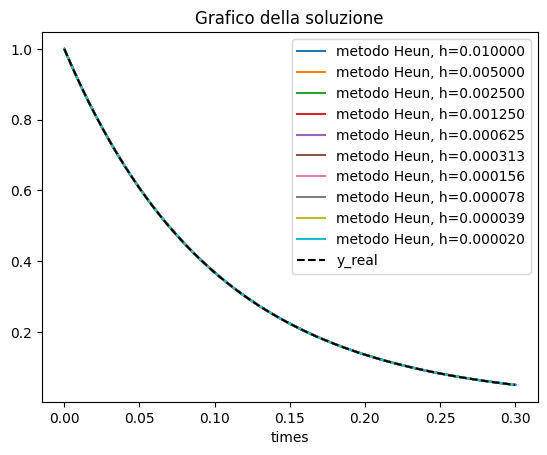

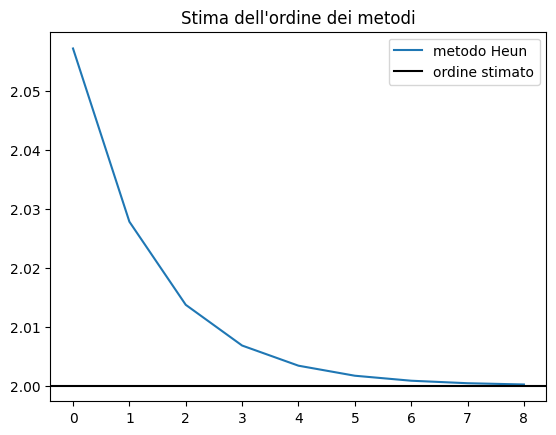

In [80]:
# Problema TEST:
k = 10.0
f = lambda t,y: -k *y
sol_real = lambda y0,t0,t: y0*np.exp(-k*(t-t0))

t0 = 0
tf = 0.3
u_0 = 1

N = 10
err = np.zeros(N)
h0  = 0.01
h_vect = np.asarray([h0/(2.**i) for i in range(0,N)])

j=0
for h in h_vect:
    times  = np.arange(0,tf+h,h)
    y_real = sol_real(1,0,times)

    u_num    = np.zeros(len(times))    # soluzione numerica
    u_n      = u_0
    u_num[0] = u_n
    
    for i in range(0,len(times)-1):
        u_n1_s = u_n + h*f(times[i],u_n)
        u_n1 = u_n + h*0.5*(f(times[i+1],u_n1_s)+f(times[i],u_n))

        u_num[i+1] = u_n1
        u_n = u_n1
    #end 
    
    err[j] = abs(u_num[-1] - y_real[-1])
    
    plt.figure(1)
    plt.plot(times,u_num, label='metodo Heun, h=%f' %h); 
    
    j+=1
#end for


## GRAFICO DELLA SOLUZIONE
plt.title('Grafico della soluzione'); plt.xlabel('times')
plt.plot(times,y_real,'k--', label='y_real'); plt.legend()


ratio = [err[i]/err[i+1] for i in range(0,N-1)]
ordine_vect = np.log(ratio)/np.log(2)
ordine_stimato = np.round(ordine_vect[-1])


print("Stima dell'ordine del metodo Heun = ",ordine_stimato)
plt.figure()
plt.plot(ordine_vect, label='metodo Heun'); 
plt.axhline(ordine_stimato,color='k',label='ordine stimato')
plt.title("Stima dell'ordine dei metodi"); plt.legend()

# Esercizio 2

Calcolare numericamente l'ordine di convergenza per i metodi "RK23","RK45" e "Radau" di solve_ivp imponendo il passo costante a tali metodi con "max_step = h", "min_step=h". Ci aspettiamo ordini 3,5 e 5 rispettivamente.


**FARE ATTENZIONE !**

Nella stima si usa err[i]/err[i+1], se a denominatore l'errore è molto piccolo vicino o addirittura sotto all'errore di macchina $\varepsilon=1e-16$ di ottengono degli errori numerici!

E' da considerare quindi solo la stima ottenuta quando i due errori ai passi h e h/2 sono sufficientemente grandi da non generare tali errori. Allo stesso tempo i passi devono essere sufficientemente piccoli da dare una soluzione, almeno approssimativa, del problema.


C:\Users\Andrea\AppData\Local\Temp\ipykernel_19384\313161960.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Stima dell'ordine del metodo Radau  =  5.0
Stima dell'ordine del metodo RK45  =  5.0
Stima dell'ordine del metodo RK23  =  3.0


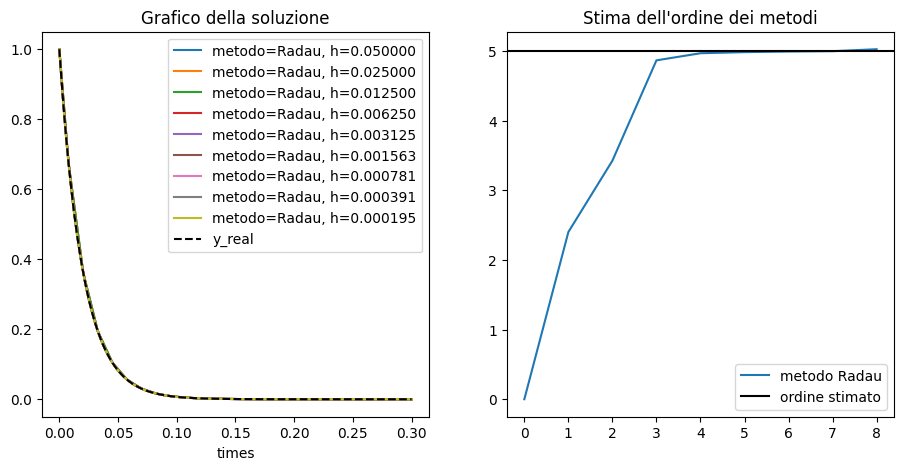

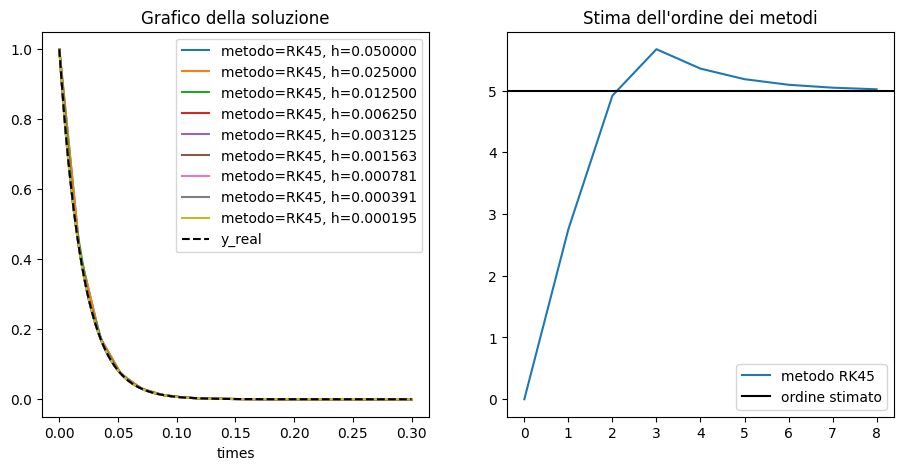

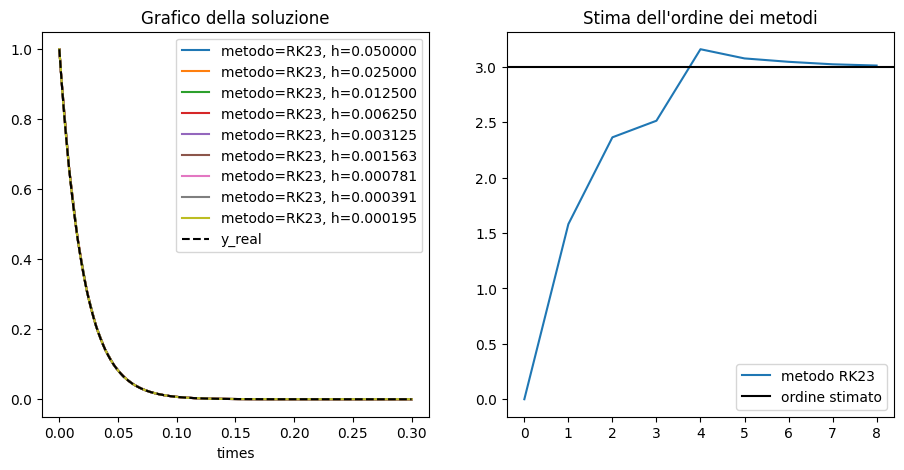

In [81]:
# Problema TEST:
k = 50.0
f = lambda t,y: -k *y
sol_real = lambda y0,t0,t: y0*np.exp(-k*(t-t0))

t0 = 0
tf = 0.3
u_0 = 1

N = 10
err = np.zeros(N)
h0  = 0.1
h_vect = np.asarray([h0/(2.**i) for i in range(0,N)])

for metodo in ['Radau','RK45','RK23']:
    plt.figure(figsize=(11,5))
    j=0
    for h in h_vect:
        sol_ivp = solve_ivp(f,[t0,tf],[u_0],method=metodo, max_step=h)

        times = sol_ivp.t 
        u_num = sol_ivp.y.reshape((sol_ivp.y.shape[1]))
        y_real = sol_real(u_0,t0,times)
             
        err[j] = abs(u_num[-1] - y_real[-1])
        
        plt.plot(times,u_num, label='metodo=%s, h=%f' %(metodo,h))
        plt.subplot(1,2,1) 
        
        j+=1
    #end for

    ## GRAFICO DELLA SOLUZIONE
    plt.title('Grafico della soluzione'); plt.xlabel('times')
    plt.plot(times,y_real,'k--', label='y_real'); plt.legend()


    ratio = [err[i]/err[i+1] for i in range(0,N-1)]
    ordine_vect = np.log(ratio)/np.log(2)
    ordine_stimato = np.round(ordine_vect[-1])


    print("Stima dell'ordine del metodo", metodo, " = ",ordine_stimato)
    plt.subplot(1,2,2)
    plt.plot(ordine_vect, label='metodo %s' %metodo); 
    plt.axhline(ordine_stimato,color='k',label='ordine stimato')
    plt.title("Stima dell'ordine dei metodi"); plt.legend()

# Esercizio 3

Estendere la stima numerica dell'ordine di convergenza dei metodi base al caso in cui la soluzione reale non sia nota, come spiegato nella "nota" del notebook precedente, ossia:

**NOTA:**

Se non si conosce la soluzione vera si può stimare $||e_n|| $ come segue:
$$||e_n|| = ||u_{n,h} - y(t_{n,h})|| \approx ||u_{n,h} - u_{2n,h/2}||$$
cioè si può approssimare $y(t_{n,h})$ con il valore ottenuto con passo $h/2$

Analogamente $$||e_{2n}|| = ||u_{2n,h/2} - y(t_{n,h})|| \approx ||u_{2n,h/2} - u_{4n,h/4}||$$
cioè si può approssimare $y(t_{n,h})$ con il valore ottenuto con passo $h/4$

Stima dell'ordine del metodo  EE  =  1.0


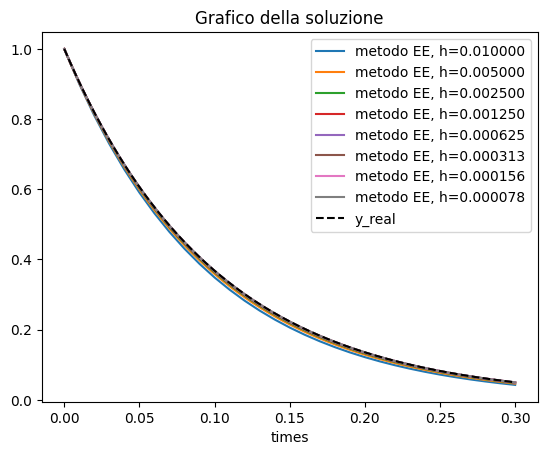

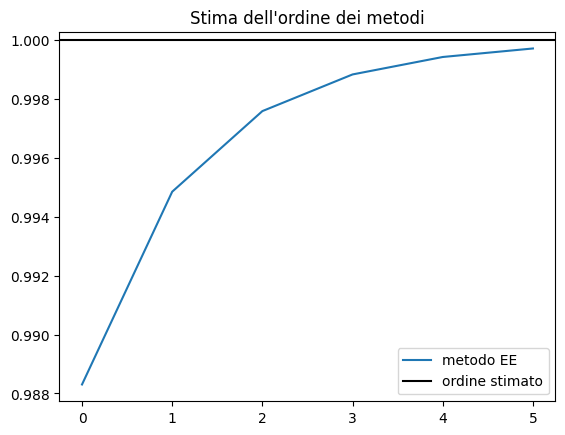

In [82]:
# Problema TEST:
k = 10.0
f = lambda t,y: -k *y

t0 = 0
tf = 0.3
u_0 = 1

N = 8
last_stored = np.zeros(N)
h0  = 0.01
h_vect = np.asarray([h0/(2.**i) for i in range(0,N)])

method='EE'
j=0
for h in h_vect:
    times  = np.arange(0,tf+h,h)

    u_num    = np.zeros(len(times));    # soluzione numerica
    u_n      = u_0
    u_num[0] = u_n
    
    if method=="EE":
        for i in range(0,len(times)-1):
            u_n1       = u_n + h*f(times[i],u_n)
            u_num[i+1] = u_n1
            u_n        = u_n1
        #end    
    elif method=="EI":
        for i in range(0,len(times)-1):
            u_n1 = optimize.newton(lambda u_n1 :  u_n1 - h*f(times[i+1],u_n1) - u_n, u_n)
            u_num[i+1] = u_n1
            u_n  = u_n1
        #end
    elif method=="TR":
        for i in range(0,len(times)-1):
            u_n1       = optimize.newton(lambda u_n1 :  u_n1 - h*0.5*(f(times[i+1],u_n1)+f(times[i],u_n)) - u_n, u_n)
            u_num[i+1] = u_n1
            u_n        = u_n1
        #end
    else:
        print('error')
    
    last_stored[j] = u_num[-1]
    
    plt.figure(1)
    plt.plot(times,u_num, label='metodo %s, h=%f' %(method,h)); 
    
    j+=1
#end for
    

## GRAFICO DELLA SOLUZIONE
y_real = sol_real(1,0,times)
plt.title('Grafico della soluzione'); plt.xlabel('times')
plt.plot(times,y_real,'k--', label='y_real'); plt.legend()

err = [last_stored[i]-last_stored[i+1] for i in range(0,N-1)]
ratio = [err[i]/err[i+1] for i in range(0,N-2)]
ordine_vect = np.log(ratio)/np.log(2)
ordine_stimato = np.round(ordine_vect[-1])


print("Stima dell'ordine del metodo ",method," = ",ordine_stimato)
plt.figure()
plt.plot(ordine_vect, label='metodo %s' %method)
plt.axhline(ordine_stimato,color='k',label='ordine stimato')
plt.title("Stima dell'ordine dei metodi"); plt.legend()